AI FINAL

In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load data 
data = pd.read_csv('All Electronics.csv')

print("Lets analyze the data structure:")
display(data.head())

Lets analyze the data structure:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"


In [166]:
# Identify unecessary data
# Drop columns that we dont need to determin popularity of a product itself
data = data.drop(columns=['main_category', 'sub_category', 'image', 'link'])

# Verify column removal
display(data.head())

,name,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...",4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...",4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...",4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...",4.3,"113,956","₹18,999","₹19,999"


Missing values:
 ratings           119
no_of_ratings     119
discount_price    484
actual_price       70
dtype: int64
Values:
 ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64
           ratings  no_of_ratings   actual_price  discount_price
count  9600.000000    9600.000000    9600.000000     9600.000000
mean      4.077576    8881.106107    5009.698254     2976.275592
std       0.374843   27945.650873   12164.404252     8639.082346
min       1.000000       1.000000      20.000000       10.000000
25%       3.900000     242.000000     849.000000      299.000000
50%       4.100000    1214.000000    1499.000000      620.500000
75%       4.300000    5430.000000    3499.000000     1895.500000
max       5.000000  437651.000000  161999.000000   134999.000000


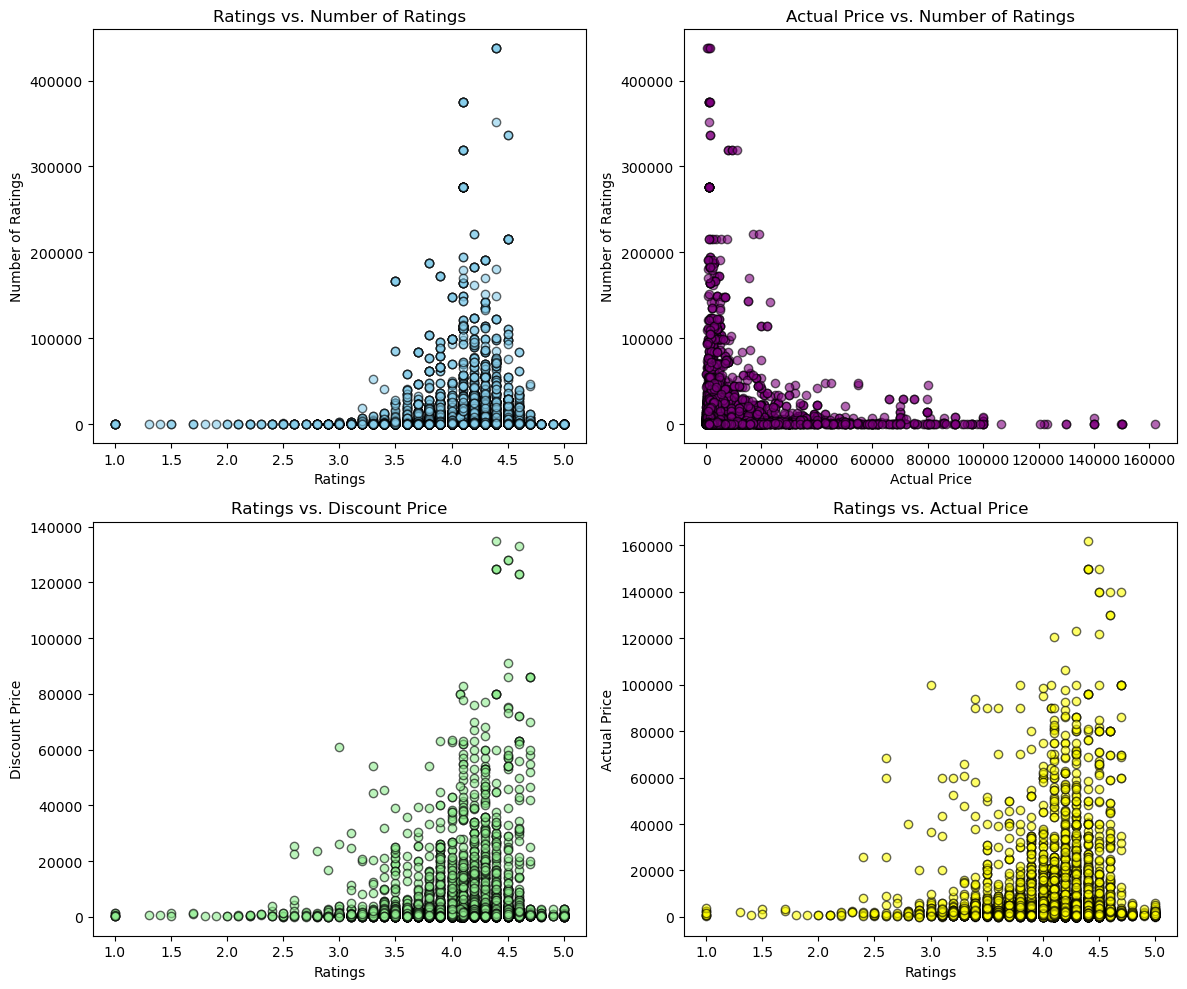

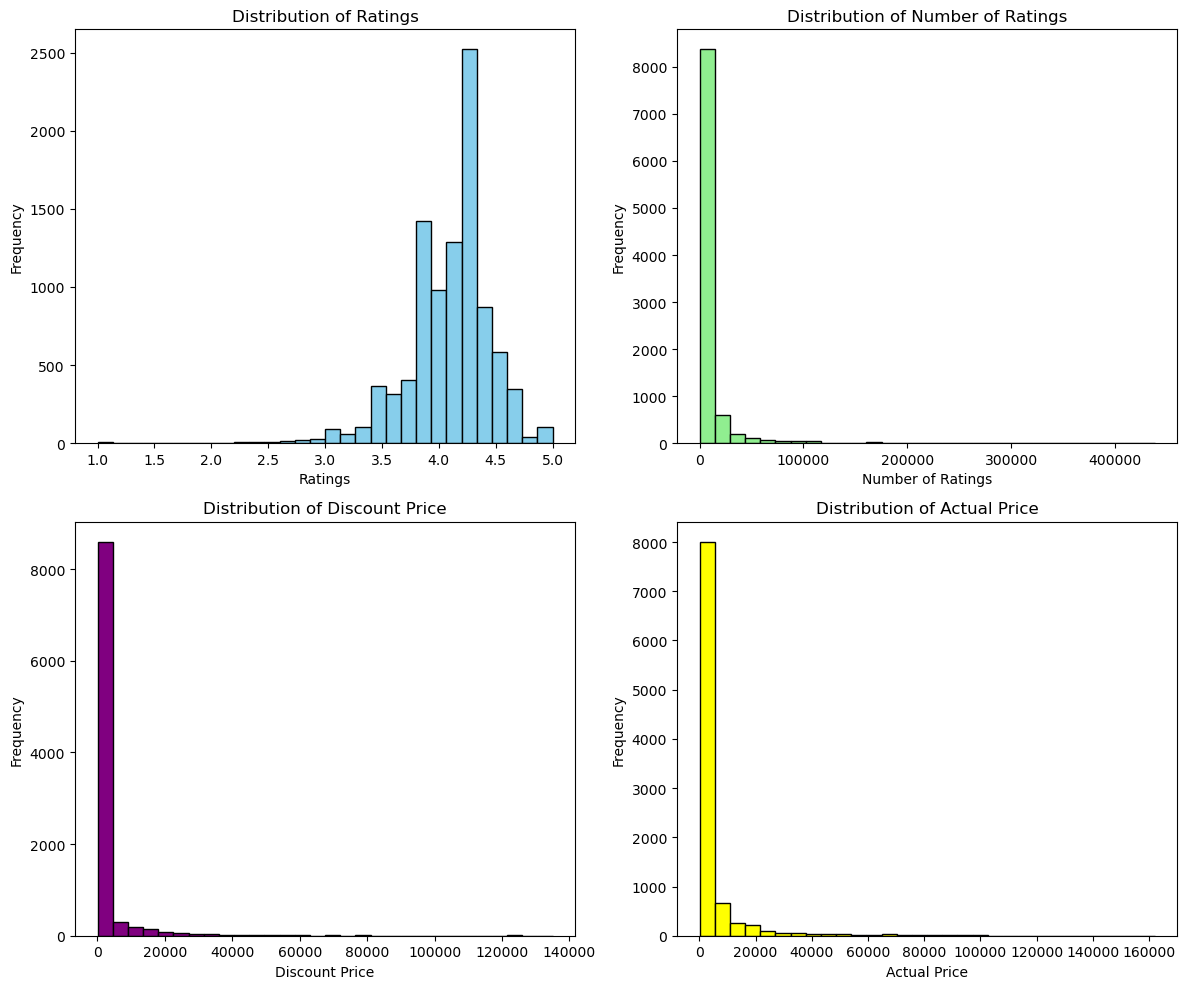

In [167]:
# Preprocessing
# Define numeric columns to clean
numeric_cols = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

# Remove non-numeric characters and change to numeric
for col in numeric_cols:
    if col == 'no_of_ratings':
        data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')
    else:
        data[col] = pd.to_numeric(data[col].astype(str).str.replace('[\₹,]', '', regex=True), errors='coerce')

# Check for missing values in numeric columns
print("Missing values:\n", data[numeric_cols].isnull().sum())

# Fill missing values in numeric columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Verify no more missing values
print("Values:\n", data[numeric_cols].isnull().sum())

print(data[['ratings','no_of_ratings', 'actual_price', 'discount_price' ]].describe())
#print(data['no_of_ratings'].describe())
#print(data['actual_price'].describe())
#print(data['discount_price'].describe())


#Scaterplot to visualize outliers
# Set up a grid of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for 'ratings' vs. 'no_of_ratings'
axes[0, 0].scatter(data['ratings'], data['no_of_ratings'], color='skyblue', edgecolor='black', alpha=0.6)
axes[0, 0].set_title('Ratings vs. Number of Ratings')
axes[0, 0].set_xlabel('Ratings')
axes[0, 0].set_ylabel('Number of Ratings')

# Scatter plot for 'ratings' vs. 'discount_price'
axes[1, 0].scatter(data['ratings'], data['discount_price'], color='lightgreen', edgecolor='black', alpha=0.6)
axes[1, 0].set_title('Ratings vs. Discount Price')
axes[1, 0].set_xlabel('Ratings')
axes[1, 0].set_ylabel('Discount Price')

# Scatter plot for 'ratings' vs. 'actual_price'
axes[1, 1].scatter(data['ratings'], data['actual_price'], color='yellow', edgecolor='black', alpha=0.6)
axes[1, 1].set_title('Ratings vs. Actual Price')
axes[1, 1].set_xlabel('Ratings')
axes[1, 1].set_ylabel('Actual Price')

# Scatter plot for 'no_of_ratings' vs. 'actual_price'
axes[0, 1].scatter(data['actual_price'], data['no_of_ratings'], color='purple', edgecolor='black', alpha=0.6)
axes[0, 1].set_title('Actual Price vs. Number of Ratings')
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Number of Ratings')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Set up a grid for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for 'ratings'
axes[0, 0].hist(data['ratings'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Ratings')
axes[0, 0].set_xlabel('Ratings')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for 'no_of_ratings'
axes[0, 1].hist(data['no_of_ratings'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Number of Ratings')
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for 'discount_price'
axes[1, 0].hist(data['discount_price'], bins=30, color='purple', edgecolor='black')
axes[1, 0].set_title('Distribution of Discount Price')
axes[1, 0].set_xlabel('Discount Price')
axes[1, 0].set_ylabel('Frequency')

# Plot histogram for 'actual_price'
axes[1, 1].hist(data['actual_price'], bins=30, color='yellow', edgecolor='black')
axes[1, 1].set_title('Distribution of Actual Price')
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
   

X_train shape: (7680, 4)
X_test shape: (1920, 4)
y_train shape: (7680,)
y_test shape: (1920,)
Accuracy: 0.9989583333333333
Precision: 1.0
Recall: 0.9904761904761905
F1 Score: 0.9952153110047847

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1710
           1       1.00      0.99      1.00       210

    accuracy                           1.00      1920
   macro avg       1.00      1.00      1.00      1920
weighted avg       1.00      1.00      1.00      1920



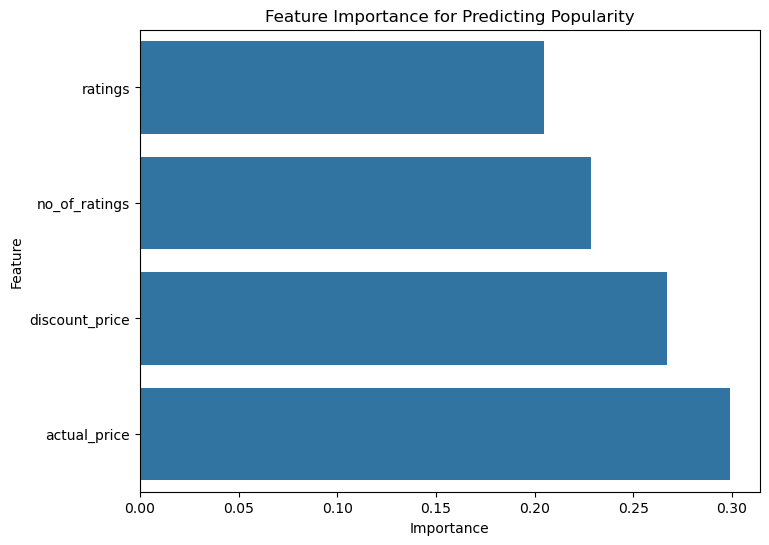

Cross-Validation Accuracy Scores: [0.99934896 1.         1.         1.         1.        ]
Average Cross-Validation Accuracy: 0.9998697916666668


In [ ]:
# Set thresholds for target variable
discount_price_threshold = data['discount_price'].quantile(0.75)
actual_price_threshold = data['actual_price'].quantile(0.50)
ratings_threshold = data['ratings'].quantile(0.25)
ratings_count_threshold = data['no_of_ratings'].quantile(0.75)

# define target variable 'popular'
data['popular'] = (
    (data['discount_price'] < discount_price_threshold) &
    (data['actual_price'] > actual_price_threshold) &
    (data['ratings'] > ratings_threshold) &
    (data['no_of_ratings'] < ratings_count_threshold)
).astype(int)

# Define features
X = data[['ratings', 'no_of_ratings', 'discount_price', 'actual_price']]
y = data['popular']

# Normalize the feature columns only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data is split into training and test sets 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#double checking split Training Set (80%): 9,600 * 0.8 = 7,680 rows - Test Set (20%): 9,600 * 0.2 = 1,920 rows

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Initialize Random Forrest Model
#random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Define model with adjusted hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=25,        # lower number if needed
    max_depth=10,            # restricts depth
    #max_features='sqrt',     # limits features considered at each split
    random_state=42,
    bootstrap=True           # ensures randomness
)

# Train model
random_forest_model.fit(X_train, y_train)

# Predict on test set
y_pred = random_forest_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
feature_importances = random_forest_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance for Predicting Popularity')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Perform 5-fold cross-validation on the training set
cross_val_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Average Cross-Validation Accuracy:", cross_val_scores.mean())


